In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\udaya\OneDrive\Desktop\Excel_Tables\spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['text'] = df['Message']
df['target'] =df['Category']

In [8]:
df

,Category,Message,text,target
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",ham
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",ham
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,spam
5568,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home?,ham
5569,ham,"Pity, * was in mood for that. So...any other s...","Pity, * was in mood for that. So...any other s...",ham
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like i'd...,ham


In [9]:
df.drop(['Message','Category'],axis=1,inplace=True)

In [10]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# *Checking for Duplicates and Missing values*

In [14]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [15]:
df.duplicated().sum()

415

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5157, 2)

<Axes: xlabel='target', ylabel='count'>

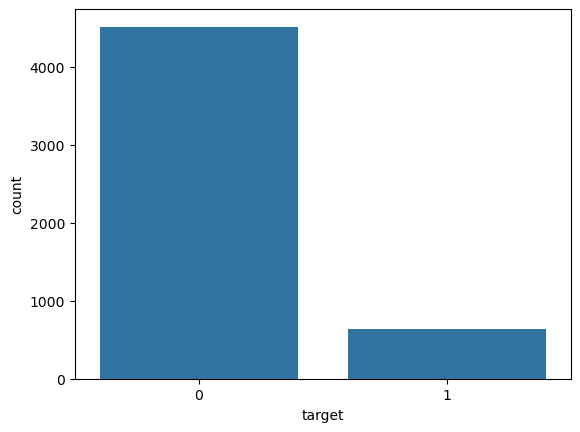

In [19]:
import seaborn as sns
sns.countplot(df,x='target')

# *Data Preprocessing include Lowercase text, remove special characters ,stop words and Tokenize*

In [21]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [24]:
l =[]
for i in df['text']:
    temp=nltk.word_tokenize(i)
    l.append(len(temp))
df['num_words'] = l

In [25]:
df.head()

,text,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [26]:
df['num_sentance'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,text,target,num_characters,num_words,num_sentance
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [28]:
# Describing include target feature
df.describe()

,target,num_characters,num_words,num_sentance
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
# Describing  without including target feature
df[['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#nThis line filters the DataFrame to include only rows where the 'target' column equals 0 (ham messages). 
df[df['target']==0][['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#nThis line filters the DataFrame to include only rows where the 'target' column equals 1 (spam messages). 
df[df['target']==1][['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Figure size 1200x600 with 0 Axes>

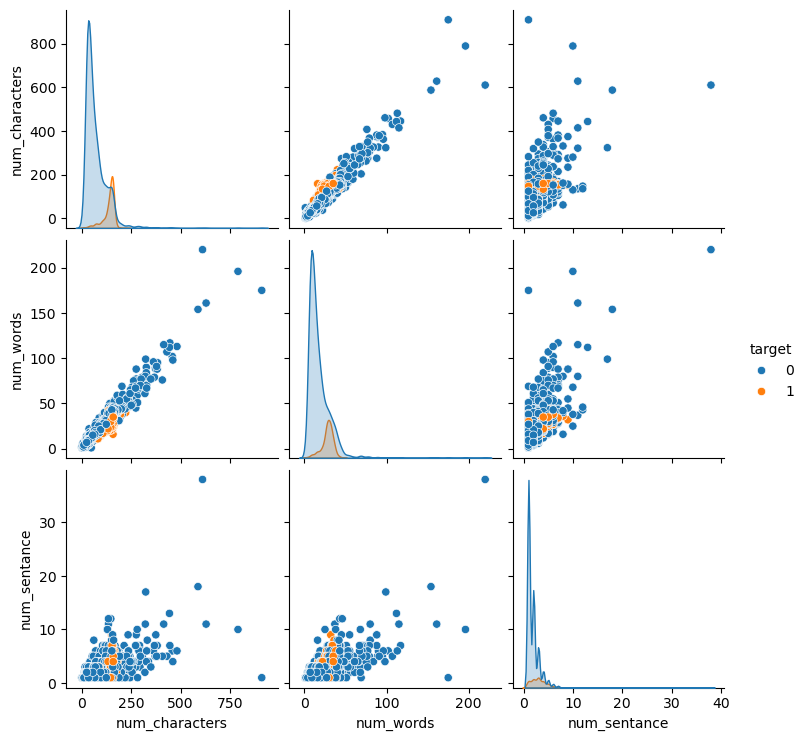

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.pairplot(df,hue="target")

<Axes: >

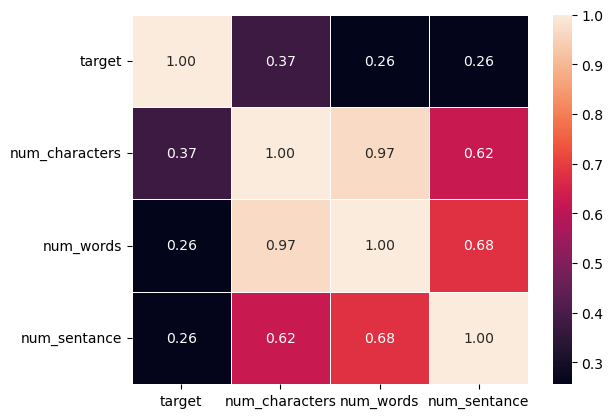

In [33]:
sns.heatmap(df.corr(numeric_only=True),linewidth=.5,annot=True, fmt=".2f")

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def transformer(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
transformer("From rudimentary tasks such as text pre-processing to tasks like vectorized representation of text – NLTK’s API has covered everything. In this article, we will accustom ourselves to the basics of NLTK and perform some crucial NLP tasks: Tokenization, Stemming, Lemmatization, and POS Tagging.")

'rudimentari task text task like vector represent text nltk api cover everyth articl accustom basic nltk perform crucial nlp task token stem lemmat po tag'

In [36]:
df["transformed_text"] = df["text"].apply(transformer)

In [37]:
df.head()

,text,target,num_characters,num_words,num_sentance,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [38]:
df1 = df
df1.to_csv(r"C:\Users\udaya\OneDrive\Desktop\Excel_Tables\processed.csv",index=False)

In [39]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

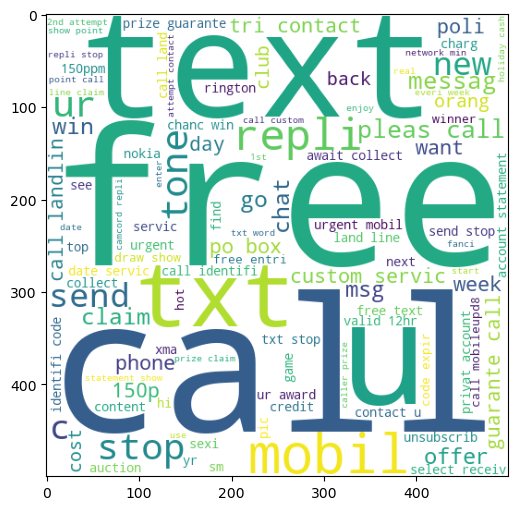

In [41]:
# Most frequet words of spam messages.
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [42]:
# Most frequet words of ham messages.
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

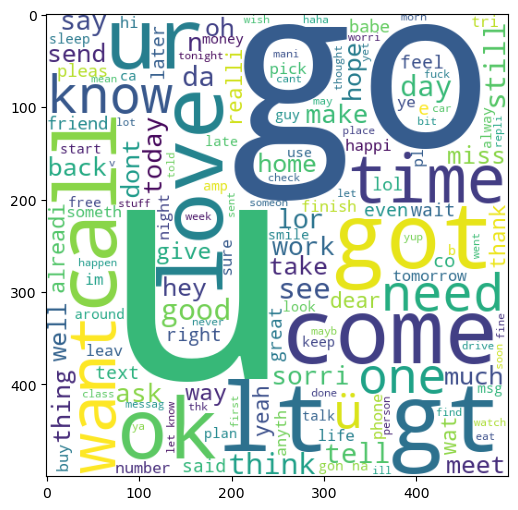

In [43]:
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [44]:
# Aim is to get the bar graph of first 30 words of spam messages with frequency count.
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split(" "):
        spam_corpus.append(word)
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [45]:
import seaborn as sns
from collections import Counter
words=[]
count=[]
word_counts=Counter(spam_corpus)
top_30_words = word_counts.most_common(30)
for i in range(30):
    words.append(top_30_words[i][0])
    count.append(top_30_words[i][1])

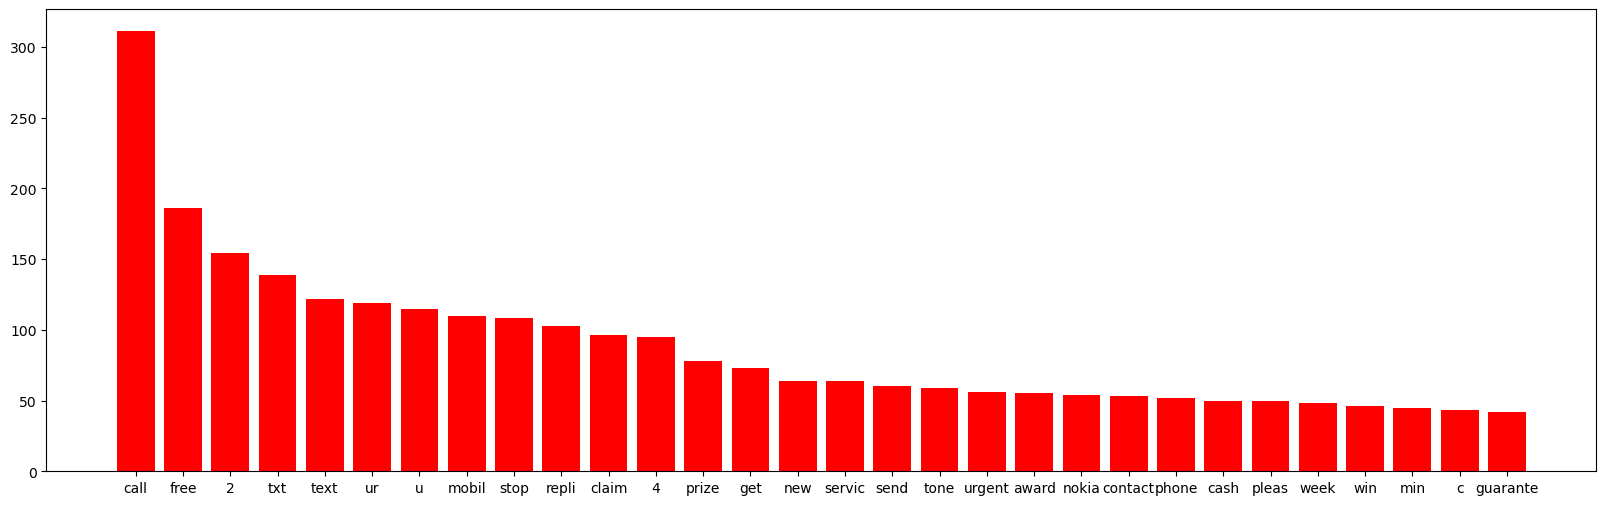

In [46]:
plt.figure(figsize=(20,6))
plt.bar(words,count,color="red")
plt.show()

In [47]:
#Aim is to get the bar graph of first 30 words of ham messages with frequency count.
ham_corpus=[]
temp = " ".join(df[df['target']==0]['transformed_text'])
ham_corpus = nltk.word_tokenize(temp)

In [48]:
import seaborn as sns
from collections import Counter
words=[]
count=[]
word_counts=Counter(ham_corpus)
top_30_words = word_counts.most_common(30)
for i in range(30):
    words.append(top_30_words[i][0])
    count.append(top_30_words[i][1])

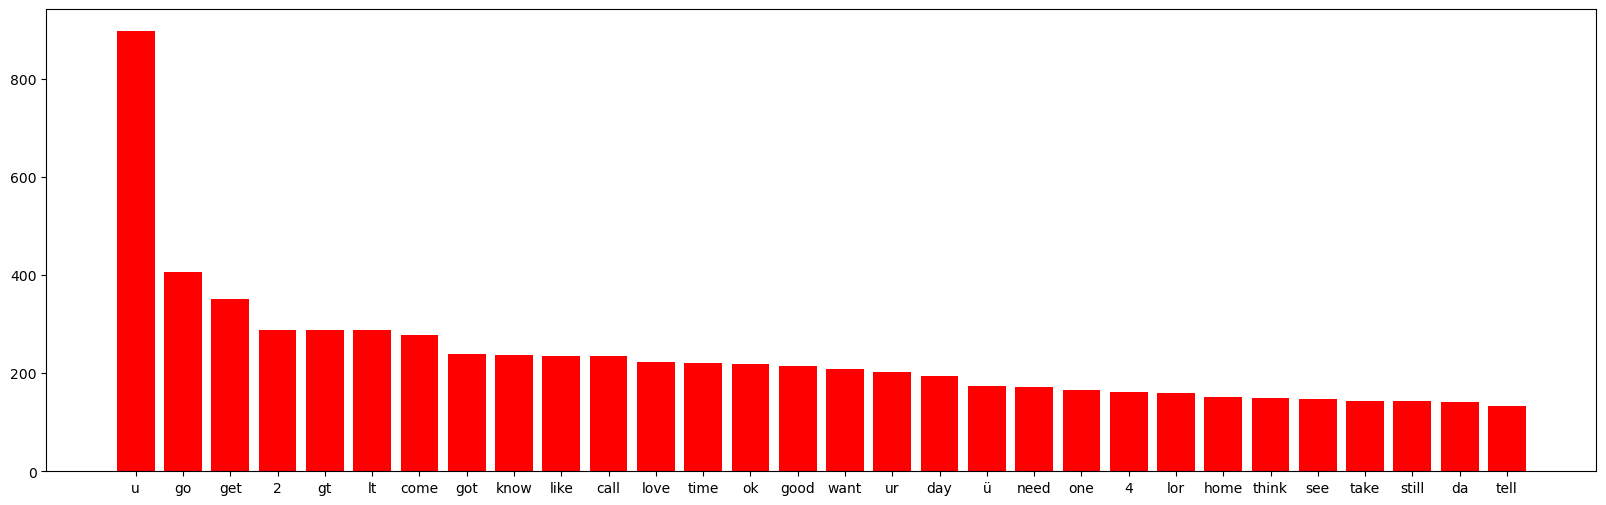

In [49]:
plt.figure(figsize=(20,6))
plt.bar(words,count,color="red")
plt.show()

# *Feature Engineering*

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
y=df['target'].values

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.shape

(4125, 3000)

In [55]:
x_test.shape

(1032, 3000)

In [56]:
y_train.shape

(4125,)

In [57]:
y_test.shape

(1032,)

# *Model Training*

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

In [60]:
ada = AdaBoostClassifier(random_state=42)
bagging = BaggingClassifier(random_state=42)
extra = ExtraTreesClassifier(random_state=42)
gradient = GradientBoostingClassifier(random_state=42)
hist = HistGradientBoostingClassifier(random_state=42)
random = RandomForestClassifier(random_state=42)
#stack = StackingClassifier()
#vector = VotingClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0,random_state=42)
decision = DecisionTreeClassifier(random_state=42,max_depth=5)
logistic = LogisticRegression(solver='liblinear', penalty='l1')
multi = MultinomialNB()
gaussian = GaussianNB()
bernoulli = BernoulliNB()

In [61]:
dict = {"ADA":ada,
       "BAG":bagging,
       "EXTRA":extra,
       "GRADIENT":gradient,
       "HIST":hist,
       "RANDOM":random,
        "SVC":svc,
        "DECISION":decision,
        "LOGISTIC":logistic,
       "MULTI":multi,
       "GAUSSIAN":gaussian,
       "BERNOULLI":bernoulli}

In [62]:
accuracy_score_list =[]
cross_validation_list =[]
precision_score_list =[]
def fun(name,model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_score_list.append(accuracy)
    cross_validation = cross_val_score(model,x_train,y_train,cv=5)
    sum=0
    for i in cross_validation:
        sum=sum+i
    cross_result = sum/5
    cross_validation_list.append(cross_result)
    precise_score = precision_score(y_test,y_pred)
    precision_score_list.append(precise_score)
    print(f"{name} ---> accuracy:{accuracy} cross_validation ---> {cross_result} precison_score ---> {precise_score}")

# *Model Evaluation*

In [64]:
for key,value in dict.items():
    fun(key,value,x_train,y_train,x_test,y_test)

C:\Users\udaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\udaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\udaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\udaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\uda

ADA ---> accuracy:0.9583333333333334 cross_validation ---> 0.9609696969696969 precison_score ---> 0.8780487804878049
BAG ---> accuracy:0.9612403100775194 cross_validation ---> 0.9570909090909092 precison_score ---> 0.8636363636363636
EXTRA ---> accuracy:0.9796511627906976 cross_validation ---> 0.9745454545454546 precison_score ---> 0.967479674796748
GRADIENT ---> accuracy:0.9622093023255814 cross_validation ---> 0.9597575757575758 precison_score ---> 0.9369369369369369
HIST ---> accuracy:0.9777131782945736 cross_validation ---> 0.9675151515151516 precison_score ---> 0.9448818897637795
RANDOM ---> accuracy:0.9767441860465116 cross_validation ---> 0.9713939393939395 precison_score ---> 0.9745762711864406
SVC ---> accuracy:0.9767441860465116 cross_validation ---> 0.9740606060606061 precison_score ---> 0.9516129032258065
DECISION ---> accuracy:0.9418604651162791 cross_validation ---> 0.9352727272727271 precison_score ---> 0.8518518518518519
LOGISTIC ---> accuracy:0.9515503875968992 cross_v

In [83]:
list(dict.keys())

['ADA',
 'BAG',
 'EXTRA',
 'GRADIENT',
 'HIST',
 'RANDOM',
 'SVC',
 'DECISION',
 'LOGISTIC',
 'MULTI',
 'GAUSSIAN',
 'BERNOULLI']

In [85]:
accuracy_score_list

[0.9583333333333334,
 0.9612403100775194,
 0.9796511627906976,
 0.9622093023255814,
 0.9777131782945736,
 0.9767441860465116,
 0.9767441860465116,
 0.9418604651162791,
 0.9515503875968992,
 0.9777131782945736,
 0.8817829457364341,
 0.9854651162790697]

In [87]:
precision_score_list

[0.8780487804878049,
 0.8636363636363636,
 0.967479674796748,
 0.9369369369369369,
 0.9448818897637795,
 0.9745762711864406,
 0.9516129032258065,
 0.8518518518518519,
 0.8909090909090909,
 1.0,
 0.5307017543859649,
 0.984]

In [111]:
temp = {"Algorithms" : list(dict.keys()) ,"accuracy": accuracy_score_list,"precision":precision_score_list}
performance_df = pd.DataFrame(temp)
print(performance_df.sort_values(by=['accuracy','precision'],ascending=False))

   Algorithms  accuracy  precision
11  BERNOULLI  0.985465   0.984000
2       EXTRA  0.979651   0.967480
9       MULTI  0.977713   1.000000
4        HIST  0.977713   0.944882
5      RANDOM  0.976744   0.974576
6         SVC  0.976744   0.951613
3    GRADIENT  0.962209   0.936937
1         BAG  0.961240   0.863636
0         ADA  0.958333   0.878049
8    LOGISTIC  0.951550   0.890909
7    DECISION  0.941860   0.851852
10   GAUSSIAN  0.881783   0.530702


In [125]:
performance_df1 = performance_df.melt(id_vars = "Algorithms",value_vars=["accuracy","precision"])
performance_df1

,Algorithms,variable,value
0,ADA,accuracy,0.958333
1,BAG,accuracy,0.961240
2,EXTRA,accuracy,0.979651
3,GRADIENT,accuracy,0.962209
4,HIST,accuracy,0.977713
5,RANDOM,accuracy,0.976744
6,SVC,accuracy,0.976744
7,DECISION,accuracy,0.941860
8,LOGISTIC,accuracy,0.951550
9,MULTI,accuracy,0.977713


<Axes: xlabel='Algorithms', ylabel='value'>

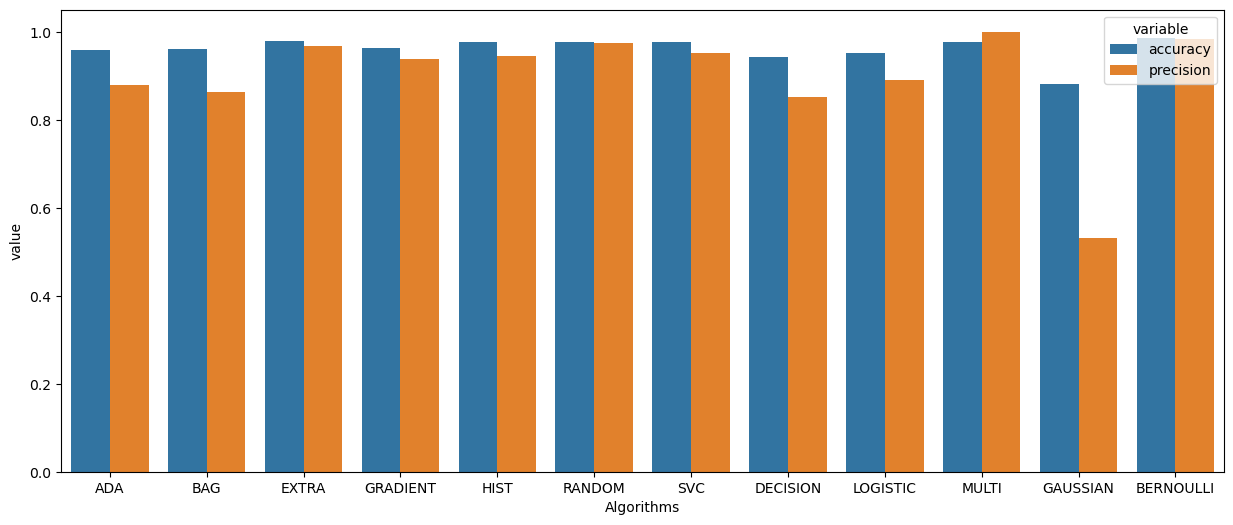

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.barplot(performance_df1,x='Algorithms',y="value",hue="variable")